In [1]:
import pandas as pd

path = "./data/housing.csv"

data = pd.read_csv(path)

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


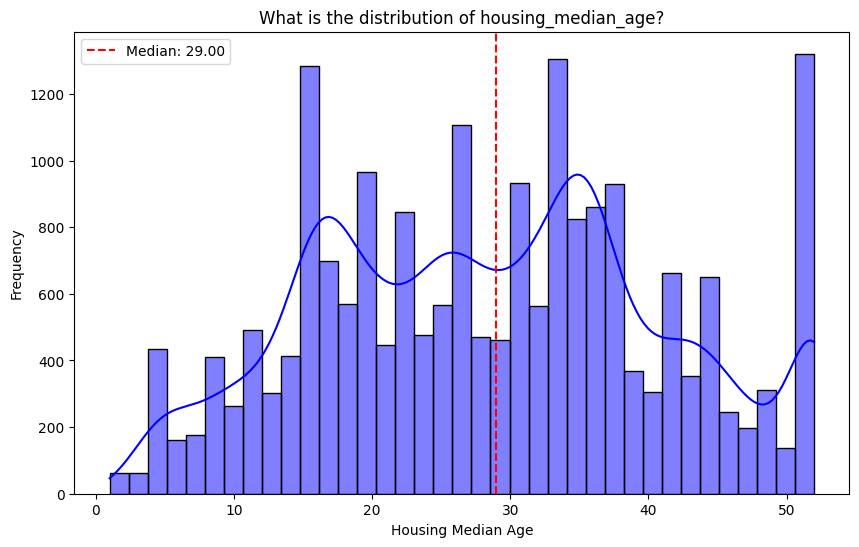

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i.  ..
def plot(data: pd.DataFrame):

     # only modify this section
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='housing_median_age', kde=True, color='blue', alpha=0.5)
    plt.axvline(x=data['housing_median_age'].median(), color='red', linestyle='--', label=f'Median: {data["housing_median_age"].median():,.2f}')
    plt.legend()
    plt.title('What is the distribution of housing_median_age?', wrap=True)
    plt.xlabel('Housing Median Age')
    plt.ylabel('Frequency')
    return plt;

chart = plot(data)

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from lida import Manager, llm

lida = Manager(text_gen = llm("openai")) # palm, cohere ..

In [5]:
summary = lida.summarize("./data/housing.csv")

summary

{'name': 'housing.csv',
 'file_name': 'housing.csv',
 'dataset_description': '',
 'fields': [{'column': 'longitude',
   'properties': {'dtype': 'number',
    'std': 2.0231618362315236,
    'min': -124.3,
    'max': -114.55,
    'samples': [-116.99, -118.1, -115.62],
    'num_unique_values': 669,
    'semantic_type': '',
    'description': ''}},
  {'column': 'latitude',
   'properties': {'dtype': 'number',
    'std': 2.141434460355563,
    'min': 32.55,
    'max': 41.92,
    'samples': [39.38, 39.03, 33.8],
    'num_unique_values': 660,
    'semantic_type': '',
    'description': ''}},
  {'column': 'housing_median_age',
   'properties': {'dtype': 'number',
    'std': 12.467916378686214,
    'min': 2.0,
    'max': 52.0,
    'samples': [48.0, 41.0, 3.0],
    'num_unique_values': 51,
    'semantic_type': '',
    'description': ''}},
  {'column': 'total_rooms',
   'properties': {'dtype': 'number',
    'std': 2227.970479254633,
    'min': 8.0,
    'max': 37937.0,
    'samples': [1240.0, 6603

In [7]:
pd.DataFrame(summary["fields"])

,column,properties
0,longitude,"{'dtype': 'number', 'std': 2.0231618362315236,..."
1,latitude,"{'dtype': 'number', 'std': 2.141434460355563, ..."
2,housing_median_age,"{'dtype': 'number', 'std': 12.467916378686214,..."
3,total_rooms,"{'dtype': 'number', 'std': 2227.970479254633, ..."
4,total_bedrooms,"{'dtype': 'number', 'std': 422.2673695326552, ..."
5,population,"{'dtype': 'number', 'std': 1140.739275918484, ..."
6,households,"{'dtype': 'number', 'std': 384.9317181394569, ..."
7,median_income,"{'dtype': 'number', 'std': 1.9586226746075461,..."
8,median_house_value,"{'dtype': 'number', 'std': 117470.76461350403,..."
9,ocean_proximity,"{'dtype': 'category', 'samples': ['<1H OCEAN',..."


In [8]:
goals = lida.goals(summary, n=3)
pd.DataFrame(goals)

,index,question,visualization,rationale
0,0,What is the distribution of housing_median_age?,histogram of housing_median_age,This tells about the age distribution of house...
1,1,What is the relationship between median_income...,scatter plot of median_income and median_house...,This helps to identify if there is a correlati...
2,2,What is the distribution of population?,histogram of population,This helps to understand the population densit...


In [9]:
from lida.utils import plot_raster

charts = lida.visualize(summary=summary, goal=goals[0])

charts

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAADWc0lEQVR4nOzdeXjU5NoG8DuZTqcrXaC0lKUFWqBFEKkgRXaRHdlEXFBAPCACKgryuQMuuBzQo4BwFMH1oCigh30RRDZlV2kpe4vQQgsF6T4zyfdHzqQd2sIE2iYzvX/XNRdDZsmTyT1J33mTN4IsyzKIiIiIiIiISFei3gUQERERERERERvoRERERERERIbABjoRERERERGRAbCBTkRERERERGQAbKATERERERERGQAb6EREREREREQGwAY6ERERERERkQGwgU5ERERERERkAGygExERERERERkAG+hEREREREREBsAGOhEREREREZEBsIFOREREREREZABsoBMREREREREZABvoRERERERERAbABjoRERERERGRAbCBTkRERERERGQAbKATERERERERGQAb6EREREREREQGwAY6ERERERERkQGwgU5ERERERERkAGygExERERERERkAG+hEREREREREBsAGOhEREREREZEBsIFOREREREREZABsoBMREREREREZABvoRERERERERAbABjoRERERERGRAbCBTkRERERERGQAbKATERERERERGQAb6EREREREREQGwAY6ERERERERkQGwgU5ERERERERkAGygExERERERERkAG+hEREREREREBsAGOhEREREREZEBsIFOREREREREZABsoBMREREREREZABvoRERERERERAbABjoRERERERGRAbCBTkRERERERGQAbKATERERERERGQAb6EREREREREQGwAY6ERERERERk

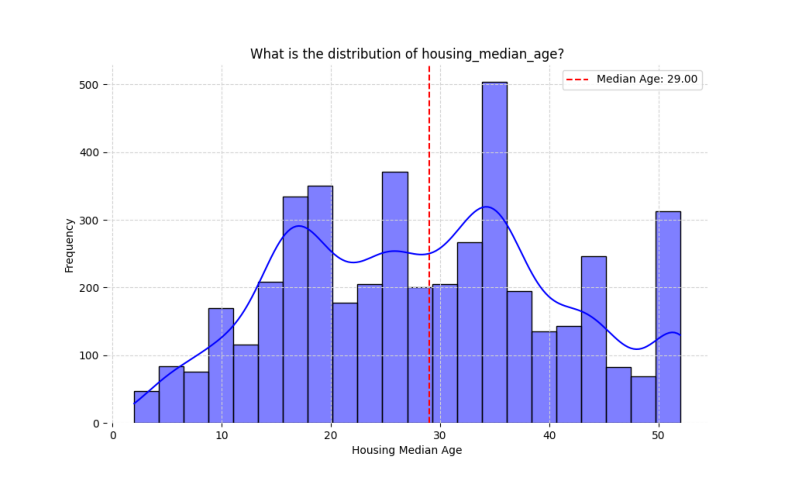

In [12]:
plot_raster(charts[0].raster)